# Hotel Reservations Prediction

# About the Dataset

In [1]:
#Booking_ID: unique identifier of each booking
#no_of_adults: Number of adults
#no_of_children: Number of Children
#no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
#no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
#type_of_meal_plan: Type of meal plan booked by the customer:
#required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
#room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
#lead_time: Number of days between the date of booking and the arrival date
#arrival_year: Year of arrival date
#arrival_month: Month of arrival date
#arrival_date: Date of the month
#market_segment_type: Market segment designation.
#repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
#no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
#no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
#avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
#no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
#booking_status: Flag indicating if the booking was canceled or not.

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Overview of dataset

In [3]:
df = pd.read_csv("C:/Users/ELCOT/Downloads/Hotel Reservations.csv")

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.shape

(36275, 19)

In [6]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [8]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [11]:
df.duplicated().any()

False

In [12]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# Data Analysis with Visualization

In [13]:
#droppping uncessary colulmn
df.drop(columns = "Booking_ID", inplace = True)

<Axes: >

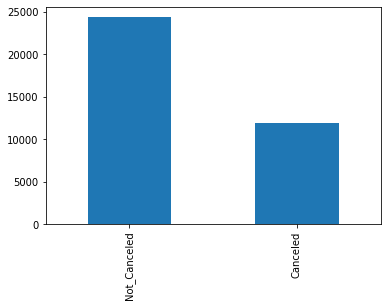

In [14]:
df['booking_status'].value_counts().plot(kind="bar")

<Axes: >

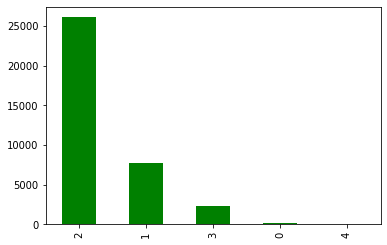

In [15]:
df['no_of_adults'].value_counts().plot(kind="bar", color="green")

<Axes: >

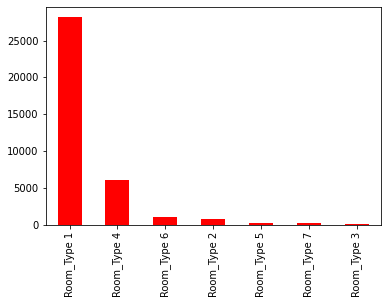

In [16]:
df['room_type_reserved'].value_counts().plot(kind="bar", color="red")

<Axes: >

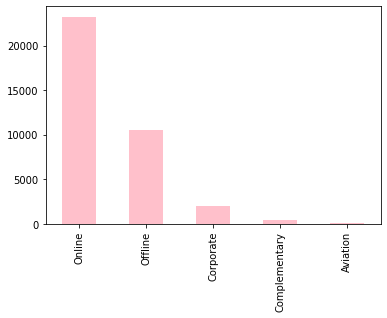

In [17]:
df['market_segment_type'].value_counts().plot(kind="bar", color="pink")

<Axes: >

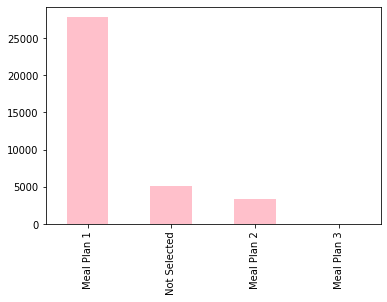

In [18]:
df['type_of_meal_plan'].value_counts().plot(kind="bar", color="pink")

<Axes: >

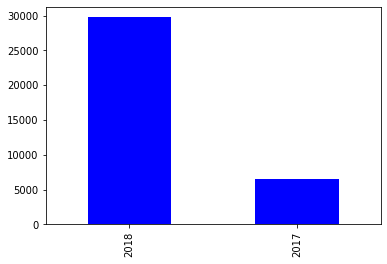

In [19]:
df['arrival_year'].value_counts().plot(kind="bar", color="blue")

<Axes: xlabel='booking_status', ylabel='arrival_year'>

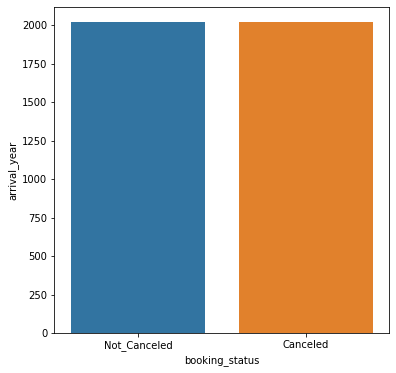

In [20]:
plt.figure(figsize=(6,6))
sns.barplot(x="booking_status", y="arrival_year", data=df)

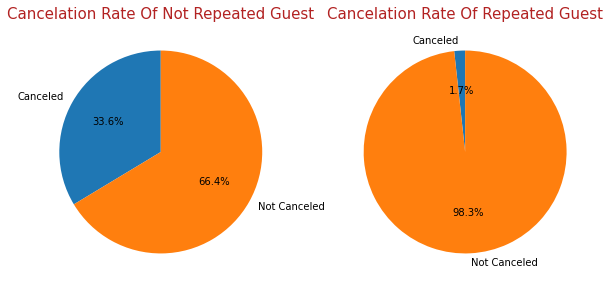

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'aspect': 'equal'})
ax[0].pie([11896,23476], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Cancelation Rate Of Not Repeated Guest",color="#b22222",fontsize=15)
ax[1].pie([16,914], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("Cancelation Rate Of Repeated Guest",color="#b22222",fontsize=15);

# Converting categorical into numeral

In [22]:
df["type_of_meal_plan"] = df["type_of_meal_plan"].replace({"Not Selected":0, "Meal Plan 1":1, "Meal Plan 2":2, "Meal Plan 3":3})
df["market_segment_type"] = df["market_segment_type"].replace({"Online":1, "Offline":2, "Corporate":3, "Complementary":4, "Aviation":5})
df["room_type_reserved"] = df["room_type_reserved"].replace({"Room_Type 1":1, "Room_Type 2":2, "Room_Type 3":3, "Room_Type 4":4, "Room_Type 5":5, "Room_Type 6":6, "Room_Type 7":7})
df["booking_status"] = df["booking_status"].replace({"Canceled":1, "Not_Canceled":0})

In [23]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


<Axes: xlabel='no_of_special_requests', ylabel='count'>

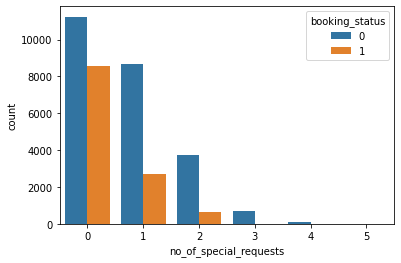

In [24]:
sns.countplot(data = df, x = "no_of_special_requests", hue = "booking_status")

<Axes: title={'center': 'Weekend Nights'}, xlabel='no_of_weekend_nights', ylabel='count'>

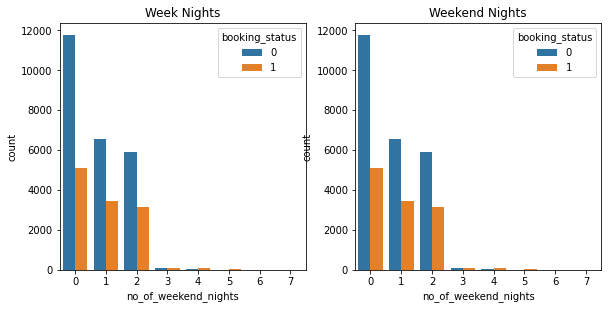

In [25]:
fig = plt.figure(figsize=(15,10))

plt.subplot(231)
plt.title("Week Nights")
sns.countplot(data=df, x="no_of_weekend_nights", hue="booking_status")

plt.subplot(232)
plt.title("Weekend Nights")
sns.countplot(data=df, x="no_of_weekend_nights", hue="booking_status")


<Axes: title={'center': 'Previously not cancelled'}, xlabel='no_of_previous_bookings_not_canceled', ylabel='lead_time'>

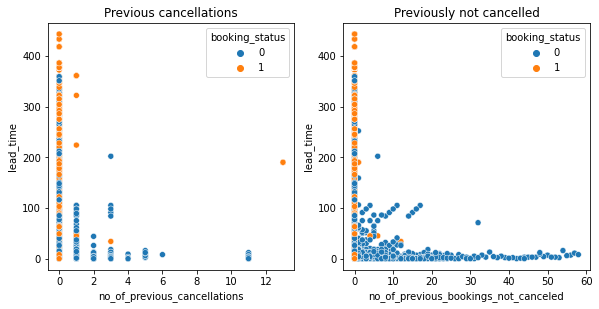

In [26]:
fig = plt.figure(figsize=(15,10))

plt.subplot(231)
plt.title("Previous cancellations")
sns.scatterplot(data=df, x="no_of_previous_cancellations",y = "lead_time", hue="booking_status")

plt.subplot(232)
plt.title("Previously not cancelled")
sns.scatterplot(data=df, x="no_of_previous_bookings_not_canceled", y = "lead_time", hue="booking_status")


<Axes: xlabel='avg_price_per_room', ylabel='lead_time'>

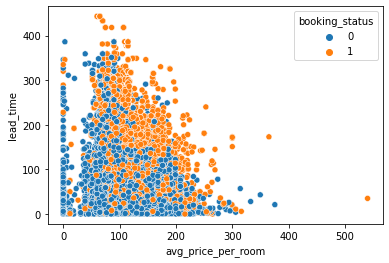

In [27]:
sns.scatterplot(data=df, x="avg_price_per_room", y = "lead_time", hue="booking_status")

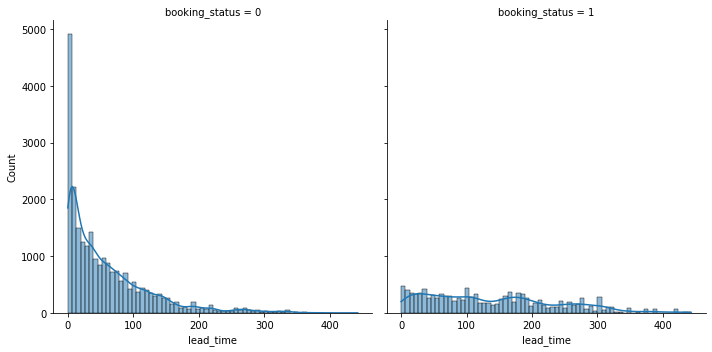

In [28]:
sns.displot(data=df,x = "lead_time",col="booking_status",kde=True)

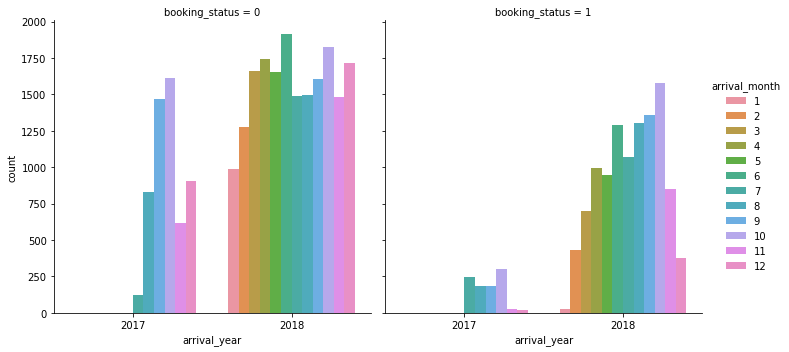

In [29]:
sns.catplot(x = "arrival_year",hue = "arrival_month",col="booking_status",data=df,kind ="count")

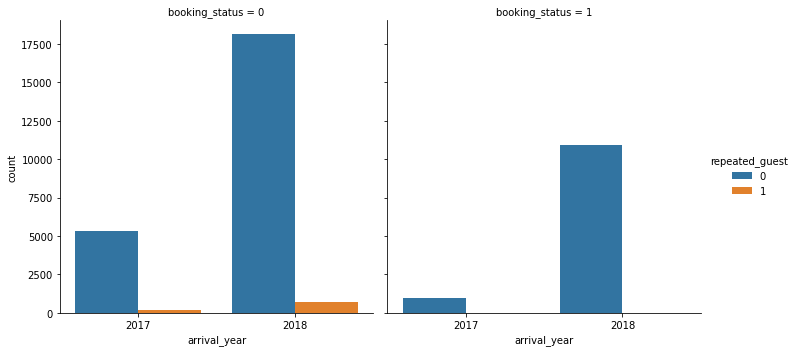

In [30]:
sns.catplot(x = "arrival_year",hue = "repeated_guest",col="booking_status",data=df,kind ="count")

<Axes: >

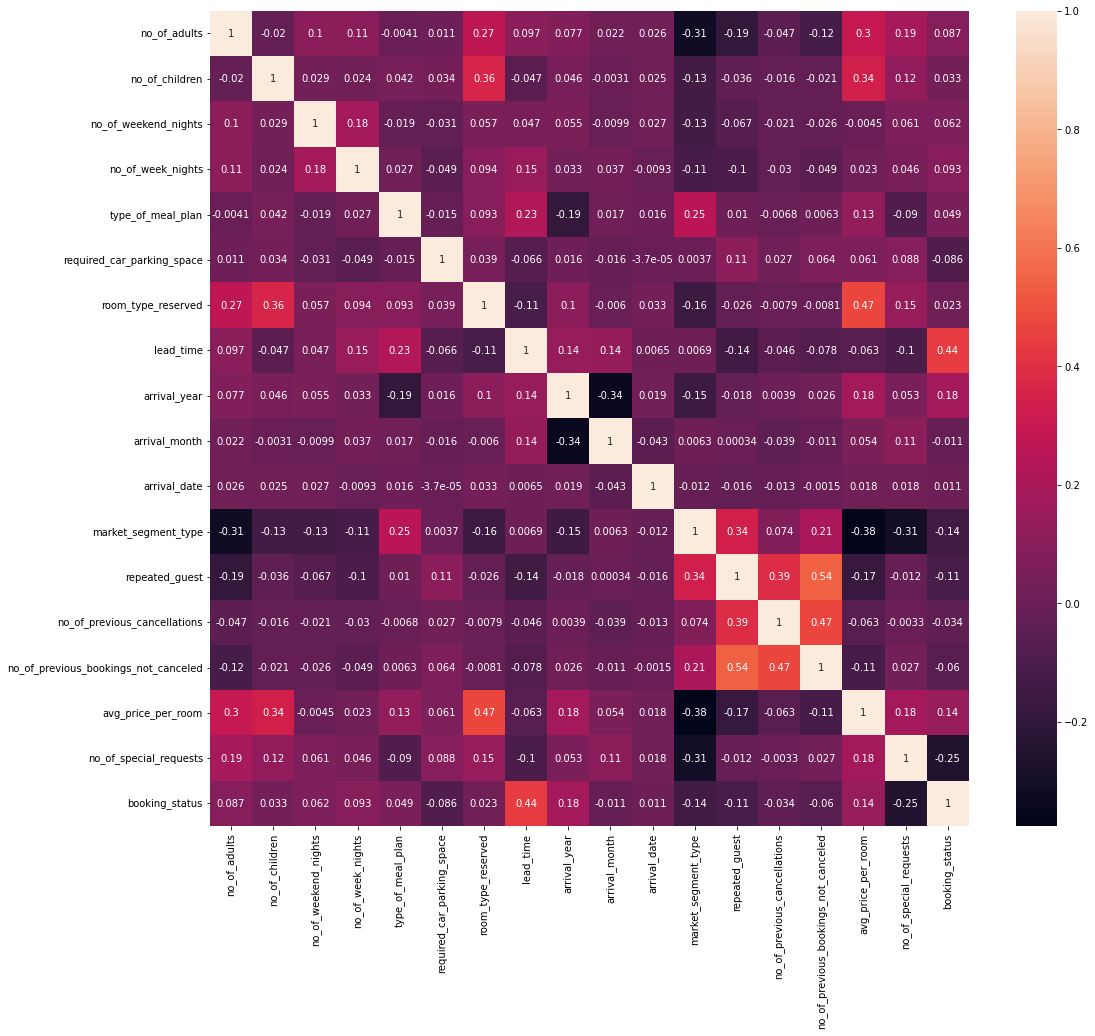

In [31]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True)

# Finding and imputing outliers

<Axes: >

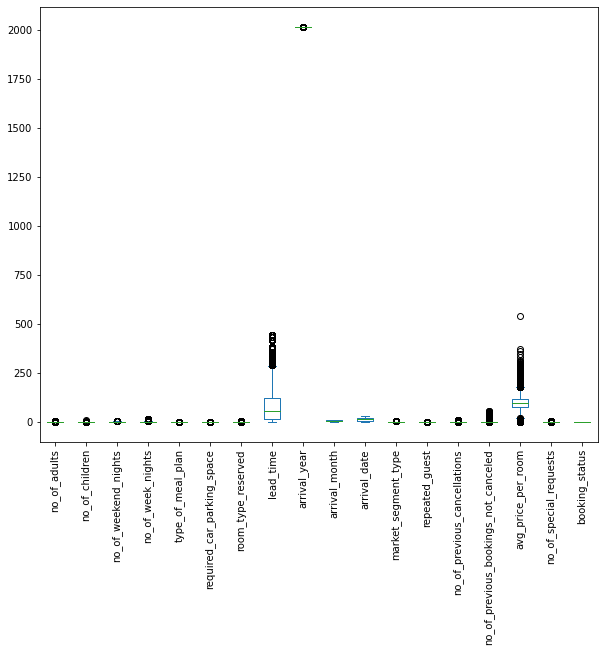

In [32]:
df.plot(kind="box",figsize=(10,8),rot=90)

In [33]:
df_num= df.select_dtypes(include=[np.number])

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_num[(df_num < lower_bound) | (df_num > upper_bound)]

In [34]:
outliers=df_num[(df_num<lower_bound)|(df_num>upper_bound)]

In [35]:
outliers.count()

no_of_adults                            10167
no_of_children                           2698
no_of_weekend_nights                       21
no_of_week_nights                         324
type_of_meal_plan                        8440
required_car_parking_space               1124
room_type_reserved                       8145
lead_time                                1331
arrival_year                             6514
arrival_month                               0
arrival_date                                0
market_segment_type                       516
repeated_guest                            930
no_of_previous_cancellations              338
no_of_previous_bookings_not_canceled      812
avg_price_per_room                       1696
no_of_special_requests                    761
booking_status                              0
dtype: int64

In [36]:
for col in df_num.columns:
    col_median = df_num[col].median()
    df_num.loc[df_num[col]<lower_bound[col],col]=col_median
    df_num.loc[df_num[col]>upper_bound[col],col]=col_median

In [37]:
outliers_impute = df_num[(df_num < lower_bound) | (df_num > upper_bound)]

In [38]:
outliers_impute.count()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [39]:
x = df.drop(columns = "booking_status")
y = df["booking_status"]

In [40]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0


# Splitting training and testing part

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29020, 17), (29020,), (7255, 17), (7255,))

# Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss=StandardScaler()

In [46]:
col=x.columns
col

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [47]:
x_fit=ss.fit_transform(x)
x_fit

array([[ 0.29889263, -0.26147045,  0.2174012 , ..., -0.08745646,
        -1.09503276, -0.78813999],
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.08745646,
         0.09280591,  0.48376045],
       [-1.62897546, -0.26147045,  1.36599262, ..., -0.08745646,
        -1.2375278 , -0.78813999],
       ...,
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.08745646,
        -0.14345087,  1.75566089],
       [ 0.29889263, -0.26147045, -0.93119021, ..., -0.08745646,
        -0.25431201, -0.78813999],
       [ 0.29889263, -0.26147045,  0.2174012 , ..., -0.08745646,
         1.65996637, -0.78813999]])

In [48]:
x=pd.DataFrame(x_fit,columns=col)
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.298893,-0.26147,0.217401,-0.144803,0.104198,-0.178819,-0.506411,1.614896,-2.137469,0.839242,-1.555662,0.810601,-0.16221,-0.063393,-0.087456,-1.095033,-0.788140
1,0.298893,-0.26147,1.365993,0.563972,-1.978334,-0.178819,-0.506411,-0.933701,0.467843,1.164990,-1.098013,-0.656692,-0.16221,-0.063393,-0.087456,0.092806,0.483760
2,-1.628975,-0.26147,1.365993,-0.853578,0.104198,-0.178819,-0.506411,-0.980250,0.467843,-1.766747,1.419055,-0.656692,-0.16221,-0.063393,-0.087456,-1.237528,-0.788140
3,0.298893,-0.26147,-0.931190,-0.144803,0.104198,-0.178819,-0.506411,1.463610,0.467843,-0.789501,0.503757,-0.656692,-0.16221,-0.063393,-0.087456,-0.097567,-0.788140
4,0.298893,-0.26147,0.217401,-0.853578,-1.978334,-0.178819,-0.506411,-0.433291,0.467843,-1.115250,-0.525952,-0.656692,-0.16221,-0.063393,-0.087456,-0.254312,-0.788140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,-0.26147,1.365993,2.690296,0.104198,-0.178819,1.636704,-0.002706,0.467843,0.187744,-1.441250,-0.656692,-0.16221,-0.063393,-0.087456,1.834665,0.483760
36271,0.298893,-0.26147,0.217401,0.563972,0.104198,-0.178819,-0.506411,1.661446,0.467843,0.839242,0.160521,-0.656692,-0.16221,-0.063393,-0.087456,-0.355483,1.755661
36272,0.298893,-0.26147,1.365993,2.690296,0.104198,-0.178819,-0.506411,0.730452,0.467843,-0.138004,-1.670074,-0.656692,-0.16221,-0.063393,-0.087456,-0.143451,1.755661
36273,0.298893,-0.26147,-0.931190,0.563972,-1.978334,-0.178819,-0.506411,-0.258730,0.467843,-1.115250,0.618170,-0.656692,-0.16221,-0.063393,-0.087456,-0.254312,-0.788140


# Maching Learning Models

# Logistic

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
m1 = LogisticRegression()

In [51]:
m1.fit(x_train, y_train)

LogisticRegression()

In [52]:
acc1 = m1.predict(x_test)

In [53]:
a1 = accuracy_score(y_test, acc1)    #accuracy of testing part
print("Accuracy of Logistic Regression: ",a1)

Accuracy of Logistic Regression:  0.7867677463818057


In [54]:
m1.score(x_train,y_train)     #accuracy of training part

0.7891454169538249

Text(33.0, 0.5, 'True Label')

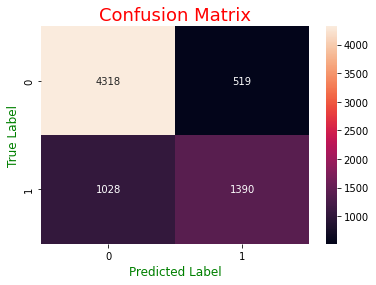

In [55]:
sns.heatmap(confusion_matrix(y_test,m1.predict(x_test)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12)

In [56]:
(4305+1382)/(4305+1382+532+1036)

0.7838731909028256

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
m2 = DecisionTreeClassifier(max_depth=5)

In [59]:
m2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
acc2 = m2.predict(x_test)

In [61]:
a2 = accuracy_score(y_test, acc2)
print("Accuracy of Descision Tree: ",a2)

Accuracy of Descision Tree:  0.8282563749138525


In [62]:
m2.score(x_train,y_train)

0.8348380427291523

<Axes: >

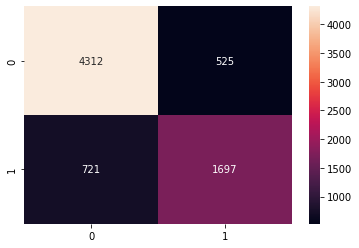

In [63]:
sns.heatmap(confusion_matrix(y_test,m2.predict(x_test)), annot=True, fmt=".0f")

# Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
m3 = GaussianNB()

In [66]:
m3.fit(x_train, y_train)

GaussianNB()

In [67]:
acc3 = m3.predict(x_test)

In [68]:
a3 = accuracy_score(y_test, acc3)
print("Accuracy of GaussianNB: ",a3)

Accuracy of GaussianNB:  0.45099931082012407


<Axes: >

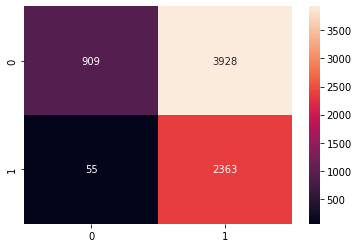

In [69]:
sns.heatmap(confusion_matrix(y_test,m3.predict(x_test)), annot=True, fmt=".0f")

# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
m4 = KNeighborsClassifier()

In [72]:
m4.fit(x_train, y_train)

KNeighborsClassifier()

In [73]:
acc4 = m4.predict(x_test)

In [74]:
a4 = accuracy_score(y_test, acc4)
print("Accuracy of KNeighbourClassifier: ",a4)

Accuracy of KNeighbourClassifier:  0.794762232942798


<Axes: >

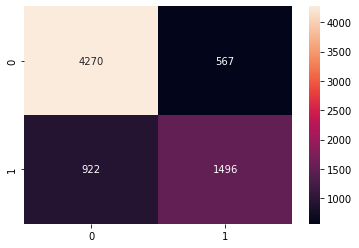

In [75]:
sns.heatmap(confusion_matrix(y_test,m4.predict(x_test)), annot=True, fmt=".0f")

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
m5 = RandomForestClassifier(max_depth=5, n_estimators=150)

In [78]:
m5.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150)

In [79]:
acc5 = m5.predict(x_test)

In [80]:
a5 = accuracy_score(y_test, acc5)
print("Accuracy of Random Forest: ",a5)

Accuracy of Random Forest:  0.8212267401791867


<Axes: >

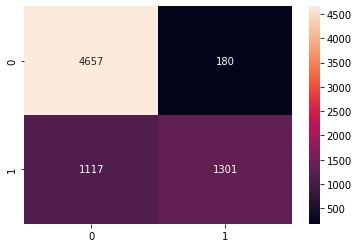

In [81]:
sns.heatmap(confusion_matrix(y_test,m5.predict(x_test)), annot=True, fmt=".0f")

# SVC

In [82]:
from sklearn.svm import SVC

In [83]:
m6 = SVC(kernel="linear")

In [84]:
m6.fit(x_train, y_train)

SVC(kernel='linear')

In [85]:
acc6 = m6.predict(x_test)

In [86]:
a6 = accuracy_score(y_test, acc6)
print("Accuracy of SVC: ",a6)

Accuracy of SVC:  0.8044107512060648


<Axes: >

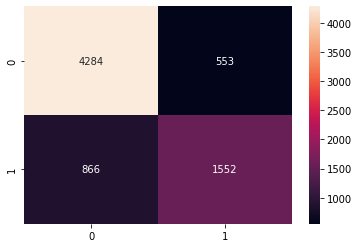

In [87]:
 sns.heatmap(confusion_matrix(y_test,m6.predict(x_test)), annot=True, fmt=".0f")

In [88]:
scores = pd.DataFrame({"Models":["Logistic", "Decision Tree", "Naive Bayes", "KNN", "Random Forest", "SVC"],
                       "Accuracy":[a1, a2, a3, a4, a5, a6]})
scores

,Models,Accuracy
0,Logistic,0.786768
1,Decision Tree,0.828256
2,Naive Bayes,0.450999
3,KNN,0.794762
4,Random Forest,0.821227
5,SVC,0.804411


######  While comparing all the models Decision tree and Random forest models works well with the dataset and gave a good accuracy.
